<div class="frontmatter text-center">
<h1>Introduction to Data Science and Programming</h1>
<h2>Lecture 13: Normal distributions</h2>
<h3>IT University of Copenhagen, Fall 2020</h3>
<h3>Instructor: Michael Szell</h3>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

## Loading a data set and initial data analysis

In [3]:
# Data set downloaded from: https://www.kaggle.com/mustafaali96/weight-height/downloads/weight-height.zip/1
!head files/weightheight.csv

This data set contains gender, height [inches], and weight [pounds] about individuals.

In [4]:
dataweightheight = np.loadtxt('files/weightheight.csv', skiprows=1, delimiter=',')

In [5]:
print(dataweightheight.shape)

(10000, 3)


In [6]:
# Turn data metric
dataweightheight[:,1] *= 2.54
dataweightheight[:,2] *= 0.453592
dataweightheight[:10,:]

array([[  0.        , 187.57142322, 109.72098511],
       [  0.        , 174.70603628,  73.62273185],
       [  0.        , 188.2396677 ,  96.49755015],
       [  0.        , 182.19668514,  99.80950419],
       [  0.        , 177.49976149,  93.59861876],
       [  0.        , 170.82265985,  69.04221615],
       [  0.        , 174.71410638,  83.42821885],
       [  0.        , 173.6052294 ,  76.19035195],
       [  0.        , 170.22813214,  79.80018673],
       [  0.        , 161.17949471,  70.94164201]])

## Exploratory data analysis of quantitative variables

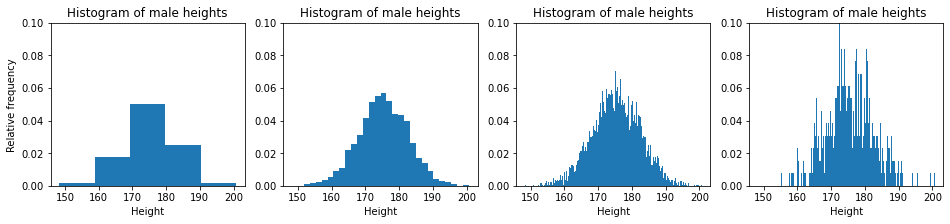

In [7]:
bins = [5, 30, 200, 2000]
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3))

maskmale = (dataweightheight[:,0] == 0)
for ax, i in zip(axes, range(4)):
    ax.hist(dataweightheight[maskmale,1], bins[i], density=True);
    ax.set_ylim([0,0.1])
    ax.set_xlabel('Height')
    if i==0:
        ax.set_ylabel('Relative frequency')
    ax.set_title('Histogram of male heights');

***
What is going on?
***

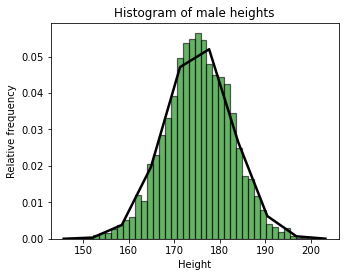

In [20]:
fig = plt.figure(figsize=(4, 3)) # create figure object with a (width,height)
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot histogram of data
axes.hist(dataweightheight[maskmale,1], 40,density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1.2);
axes.set_xlabel('Height')
axes.set_ylabel('Relative frequency')
axes.set_title('Histogram of male heights');

# Plot a normal distribution on top
import scipy.stats as stats
mu, sigma = stats.norm.fit(dataweightheight[maskmale,1])

xmin, xmax = axes.get_xlim()
x = np.linspace(xmin, xmax, 10)
p = stats.norm.pdf(x, mu, sigma)
axes.plot(x, p,"k", linewidth=2.5);

7.272212730423626

In [13]:
# Interactive version
from ipywidgets import interact
import ipywidgets as widgets

def plot_func(bins):
    fig = plt.figure(figsize=(4, 3)) # create figure object with a (width,height)
    axes = fig.add_axes([0, 0, 1, 1])
    axes.hist(dataweightheight[maskmale,1], int(bins), density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1);
    axes.set_ylim([0,0.06])
    axes.set_xlabel('Height')
    axes.set_ylabel('Relative frequency')
    axes.set_title('Histogram of male heights');
    axes.plot(x, p, 'k', linewidth=2.5);

interact(plot_func, bins = widgets.FloatSlider(value=3, min=3, max=100, step=1));

interactive(children=(FloatSlider(value=3.0, description='bins', min=3.0, step=1.0), Output()), _dom_classes=(…

We plotted a normal distribution on top. Visually it looks like a good fit. Play around with the bins.

This normal distribution has two parameters: the mean mu and standard deviation sigma.
They completely determine the shape of the whole curve.

In [17]:
mu, sigma

(175.32691860179227, 7.272212730423626)

Back to presentation

Play around with different spreads. The area under the whole curve always has to be 1.

In [14]:
# Interactive version
from ipywidgets import interact
import ipywidgets as widgets

def plot_func(sigma):
    fig = plt.figure(figsize=(4, 3)) # create figure object with a (width,height)
    axes = fig.add_axes([0, 0, 1, 1])
    p = stats.norm.pdf(x, mu, sigma)
    axes.plot(x, p, 'k', linewidth=2.5);
    axes.set_ylim([0,0.07])
    axes.set_xlim([x.min(),x.max()])
    axes.set_xlabel('Height')
    axes.set_ylabel('Relative frequency')
    axes.set_title('Model of male heights with different spreads');
    
interact(plot_func, sigma = widgets.FloatSlider(value=7, min=1, max=12, step=0.5));

interactive(children=(FloatSlider(value=7.0, description='sigma', max=12.0, min=1.0, step=0.5), Output()), _do…

### Q-Q plots

In [19]:
import statsmodels.api as sm  # For the Q-Q plot
import scipy.stats as stats  # For generating random data and for fitting

Let's check if the male heights are normally distributed:

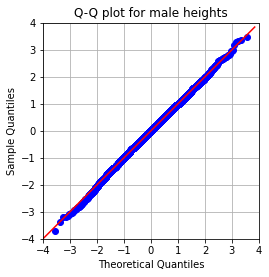

In [20]:
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
sm.qqplot(dataweightheight[maskmale,1], stats.norm, fit=True, line='45',ax=axes)
# fit=True just means that the quantiles are formed from the standardized data

# Few commands to make the plot look nicer:
axes.set_ylim([-4,4]); axes.set_xlim([-4,4])
axes.set_xticks(axes.get_yticks()); axes.grid()
axes.set_title("Q-Q plot for male heights");

All the points lie on the straight line, so the normal distribution is a good assumption.

In [ ]:
# Alternatively, use scipy.stats.probplot

#fig = plt.figure(figsize=(3, 3)) # create figure object with a (width,height)
#axes = fig.add_axes([0, 0, 1, 1])
#stats.probplot(dataweightheight[maskmale,1], dist='norm', plot=axes);

We now generate a new data set of 500 "alien heights" that is unimodal and symmetric to test normality. Notice anything particular when you scroll through the data?

In [21]:
np.random.seed(seed=6)
dataalienheights = stats.cauchy.rvs(loc=175, scale=6.7, size=514)
dataalienheights = dataalienheights[dataalienheights > 100]

print(dataalienheights.mean())
dataalienheights

183.06632514293574


array([ 194.14808047,  171.09367286,  185.64817238,  124.14543428,
        155.95119106,  177.0623888 ,  175.62945805,  173.25294963,
        171.18975683,  177.71425553,  173.68131689,  181.13055708,
        175.38004933,  176.6946823 ,  178.29156931,  393.09174254,
        185.54712207,  173.12632198,  191.35919982,  185.83836252,
        136.23296733,  180.49457693,  184.35525286,  181.15087237,
        180.16784299,  175.86644859,  158.79946409,  225.05762961,
        172.89856642,  166.74129245,  180.44681673,  543.13433621,
        168.53226443,  178.99966149,  177.15385211,  180.44878522,
        208.60015915,  171.63402424,  168.45126544,  172.88043169,
        181.55469744,  180.6885908 ,  172.96430814,  375.73958374,
        173.94959441,  172.19533928,  180.18454316,  149.7175381 ,
        172.78511117,  182.64219241,  182.35164185,  169.59275605,
        165.1106841 ,  174.39322023,  171.17297486,  181.08634407,
        165.08151617,  171.06893424,  187.58026323,  177.53229

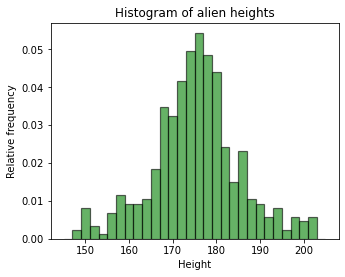

In [22]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1])

# Plot histogram of data
axes.hist(dataalienheights, 30, range=(145,205), density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1.2);
axes.set_xlabel('Height')
axes.set_ylabel('Relative frequency')
axes.set_title('Histogram of alien heights');

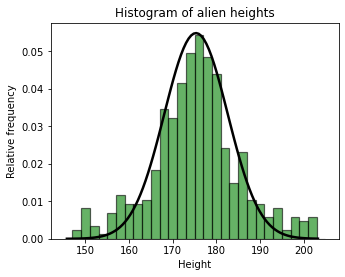

In [23]:
fig = plt.figure(figsize=(4, 3))
axes = fig.add_axes([0, 0, 1, 1]) 

# Plot histogram of data
axes.hist(dataalienheights, 30, range=(145,205), density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1.2);
axes.set_xlabel('Height')
axes.set_ylabel('Relative frequency')
axes.set_title('Histogram of alien heights');

# Plot a normal distribution on top
axes.plot(x, p, 'k', linewidth=2.5);

Looks like this could be a normal distribution. To make sure let's check the Q-Q plot.

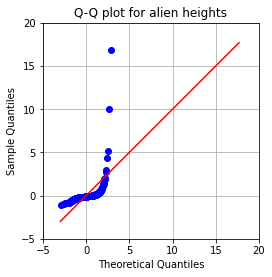

In [24]:
fig = plt.figure(figsize=(3, 3)) # create figure object with a (width,height)
axes = fig.add_axes([0, 0, 1, 1])
sm.qqplot(dataalienheights, stats.norm, fit=True, line='45',ax=axes);

# Few commands to make the plot look nicer:
axes.set_ylim([-5,20]); axes.set_xlim([-5,20])
axes.grid()
axes.set_title("Q-Q plot for alien heights");

This is definitely not a normal distribution!

If we remove the "outliers" it is still a bad fit:

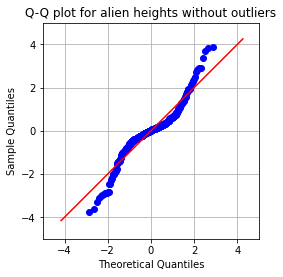

In [25]:
fig = plt.figure(figsize=(3, 3)) # create figure object with a (width,height)
axes = fig.add_axes([0, 0, 1, 1])
sm.qqplot(dataalienheights[dataalienheights<250], stats.norm, fit=True, line='45',ax=axes);

# Few commands to make the plot look nicer:
axes.set_ylim([-5,5]); axes.set_xlim([-5,5])
axes.grid()
axes.set_title("Q-Q plot for alien heights without outliers");

If you had a normal distribution with outliers, this would be different:

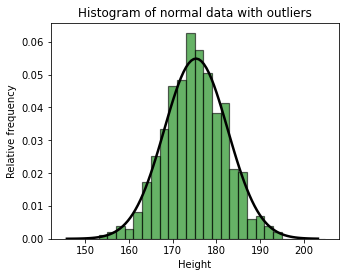

In [26]:
datanormalwithoutliers = np.append(np.random.normal(mu, sigma, 495), [260,300,400,600,700]);
fig = plt.figure(figsize=(4, 3)) # create figure object with a (width,height)
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot histogram of data
axes.hist(datanormalwithoutliers, 30, range=(145,205), density=True, alpha=0.6, color='g', edgecolor='black', linewidth=1.2);
axes.set_xlabel('Height')
axes.set_ylabel('Relative frequency')
axes.set_title('Histogram of normal data with outliers');

# Plot a normal distribution on top
axes.plot(x, p, 'k', linewidth=2.5);

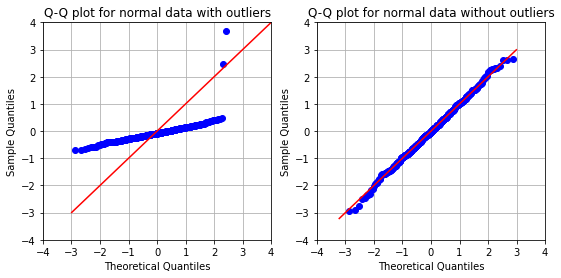

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

axes[0].set_title("Q-Q plot for normal data with outliers");
sm.qqplot(datanormalwithoutliers, stats.norm, fit=True, line='45',ax=axes[0]);

axes[1].set_title("Q-Q plot for normal data without outliers");
sm.qqplot(datanormalwithoutliers[datanormalwithoutliers < 230], stats.norm, fit=True, line='45',ax=axes[1]);

# Few commands to make the plot look nicer:
for ax in axes:
    ax.set_ylim([-4,4]); ax.set_xlim([-4,4])
    ax.set_xticks(ax.get_yticks()); ax.grid()